In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


In [3]:
df = pd.read_csv("/Users/fersaol/Library/CloudStorage/OneDrive-Personal/Documentos/MIS_COSAS_DE_THE_BRIDGE/EDA/proyecto_co2/src/data/copia_de_seguridad_2.csv")
df.head()

,Unnamed: 0,Year,Country,GDP,Population,Energy_production,Energy_consumption,Energy_type,CO2_emission,per_capita_production,...,balance,eficiency,energy_dependecy,use_intensity_pc,co2_pc,CODE_x,continent,geometry,latitude,longitude
0,0,1980-01-01,World,27770.910281,4.298127e+06,296.337228,292.899790,all_energy_types,4946.627130,68.145921,...,3.437438,16.692561,0.010547,0.000068,0.001151,None,NaN,NaN,NaN,NaN
1,1,1980-01-01,World,27770.910281,4.298127e+06,20.775178,20.702344,renewables_n_other,0.000000,68.145921,...,0.072834,0.000000,0.000745,0.000005,0.000000,None,NaN,NaN,NaN,NaN
2,2,1980-01-01,World,27770.910281,4.298127e+06,7.575700,7.575700,nuclear,0.000000,68.145921,...,0.000000,0.000000,0.000273,0.000002,0.000000,None,NaN,NaN,NaN,NaN
3,3,1980-01-01,World,27770.910281,4.298127e+06,133.111109,132.064019,petroleum_n_other_liquids,2455.243565,68.145921,...,1.047089,18.445069,0.004755,0.000031,0.000571,None,NaN,NaN,NaN,NaN
4,4,1980-01-01,World,27770.910281,4.298127e+06,54.761046,53.865223,natural_gas,1081.593377,68.145921,...,0.895822,19.751145,0.001940,0.000013,0.000252,None,NaN,NaN,NaN,NaN


Eliminamos la columna innecesaria

In [4]:
df = df.drop(columns="Unnamed: 0")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44317 entries, 0 to 44316
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     44278 non-null  object 
 1   Country                  44317 non-null  object 
 2   GDP                      44278 non-null  float64
 3   Population               44278 non-null  float64
 4   Energy_production        44278 non-null  float64
 5   Energy_consumption       44278 non-null  float64
 6   Energy_type              44278 non-null  object 
 7   CO2_emission             44278 non-null  float64
 8   per_capita_production    44278 non-null  float64
 9   Energy_intensity_by_GDP  44278 non-null  float64
 10  balance                  44278 non-null  float64
 11  eficiency                44278 non-null  float64
 12  energy_dependecy         44278 non-null  float64
 13  use_intensity_pc         44278 non-null  float64
 14  co2_pc                

Eliminamos las filas llenas de nan del final del dataframe

In [6]:
df = df.iloc[:44278,:]
df.tail()

,Year,Country,GDP,Population,Energy_production,Energy_consumption,Energy_type,CO2_emission,per_capita_production,Energy_intensity_by_GDP,balance,eficiency,energy_dependecy,use_intensity_pc,co2_pc,CODE_x,continent,geometry,latitude,longitude
44273,2019-01-01,South Sudan,17.3349,11062.1,0.291579,0.026594,all_energy_types,1.675889,2.404033,1.534111,0.264985,5.747634,0.001534,2.404033e-06,0.000151,SSD,Africa,POLYGON ((30.833852421715427 3.509171604222462...,NaN,NaN
44274,2019-01-01,South Sudan,17.3349,11062.1,0.000000,0.000000,natural_gas,0.000000,2.404033,1.534111,0.000000,0.000000,0.000000,0.000000e+00,0.000000,SSD,Africa,POLYGON ((30.833852421715427 3.509171604222462...,NaN,NaN
44275,2019-01-01,South Sudan,17.3349,11062.1,0.000000,0.000000,coal,0.000000,2.404033,1.534111,0.000000,0.000000,0.000000,0.000000e+00,0.000000,SSD,Africa,POLYGON ((30.833852421715427 3.509171604222462...,NaN,NaN
44276,2019-01-01,South Sudan,17.3349,11062.1,0.000036,0.000036,renewables_n_other,0.000000,2.404033,1.534111,0.000000,0.000000,0.000002,3.219642e-09,0.000000,SSD,Africa,POLYGON ((30.833852421715427 3.509171604222462...,NaN,NaN
44277,2019-01-01,South Sudan,17.3349,11062.1,0.291543,0.026558,petroleum_n_other_liquids,1.675889,2.404033,1.534111,0.264985,5.748336,0.001532,2.400814e-06,0.000151,SSD,Africa,POLYGON ((30.833852421715427 3.509171604222462...,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44278 entries, 0 to 44277
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     44278 non-null  object 
 1   Country                  44278 non-null  object 
 2   GDP                      44278 non-null  float64
 3   Population               44278 non-null  float64
 4   Energy_production        44278 non-null  float64
 5   Energy_consumption       44278 non-null  float64
 6   Energy_type              44278 non-null  object 
 7   CO2_emission             44278 non-null  float64
 8   per_capita_production    44278 non-null  float64
 9   Energy_intensity_by_GDP  44278 non-null  float64
 10  balance                  44278 non-null  float64
 11  eficiency                44278 non-null  float64
 12  energy_dependecy         44278 non-null  float64
 13  use_intensity_pc         44278 non-null  float64
 14  co2_pc                

Vemos cuales son los países con peor ratio de eficiencia:

In [8]:
eficiencia = df.groupby("Country")["eficiency"].mean()
eficiencia = eficiencia.sort_values(ascending=False)
eficiencia

Country
Cameroon                    1.434524e+15
Hong Kong                   1.494610e+05
Slovenia                    6.363781e+04
Maldives                    5.443496e+04
Jordan                      3.674360e+04
                                ...     
Western Sahara              0.000000e+00
American Samoa              0.000000e+00
Northern Mariana Islands    0.000000e+00
Turks and Caicos Islands    0.000000e+00
Saint Helena                0.000000e+00
Name: eficiency, Length: 228, dtype: float64

In [9]:
eficiencia.nlargest(10).index # los diez peores son:

Index(['Cameroon', 'Hong Kong', 'Slovenia', 'Maldives', 'Jordan',
       'Palestinian Territories', 'Guam', 'Israel', 'Moldova', 'The Bahamas'],
      dtype='object', name='Country')

Nos sorprende ver a estos países y queremos ver el porqué de estos datos por lo que cogemos a Camerún y vemos las columnas relacionadas con la eficiencia

In [10]:
df.loc[df.Country =="Cameroon",["eficiency","Energy_production","CO2_emission","Year"]].sort_values(by="eficiency",ascending=False)

,eficiency,Energy_production,CO2_emission,Year
25850,2.869048e+17,1.859846e-18,0.533599,2013-01-01
25840,7.427933e+01,5.546221e-03,0.411970,2011-01-01
25830,5.305667e+01,7.394961e-04,0.039235,2009-01-01
25820,5.305667e+01,7.394961e-04,0.039235,2007-01-01
25825,5.305667e+01,7.394961e-04,0.039235,2008-01-01
...,...,...,...,...
25788,0.000000e+00,3.553519e-02,0.000000,2001-01-01
25787,0.000000e+00,3.476501e-02,0.000000,2000-01-01
25785,0.000000e+00,0.000000e+00,0.000000,2000-01-01
25784,0.000000e+00,0.000000e+00,0.000000,2000-01-01


Hacemos comprobaciones para ver como salen los infinitos y si siguen saliendo con dos decimales

In [11]:
c = round(df.loc[25850,"CO2_emission"],2)
c

0.53

In [12]:
p = round(df.loc[25850,"Energy_production"],2)
p

0.0

In [13]:
c/p

/var/folders/4d/pmkjmbcd4z51v2gnz9v6pv4h0000gn/T/ipykernel_5617/2655802084.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  c/p


inf

In [14]:
df["eficiency"].isnull().sum() # no tengo nulos

0

Tengo países que aunque su producción no es 0 es tan pequeña que se puede considerar cero y que me están entorpeciendo el análisis puesto que en el ratio de eficiencia se me ponen en los puestos primeros aunque su emisión de c02 sea muy pequeña dado que su producción lo es en una proporción muchísimo mayor y me los indica como muy contaminantes. En este sentido esos números tan cercanos a 0 los vamos a redondear a 3 decimales y se nos van a quedar en 0. Al tener un número de emisiones de c02 dividido por 0 nos quedará un  numero infinito, que más tarde vamos a sustituir por 0:

In [15]:
# primero redondeamos todo el dataframe excepto las de tipo object a 3 decimales:
df_numeros = df.select_dtypes(exclude="object").round(3)

In [16]:
df_object = df.select_dtypes(include="object")

In [17]:
# luego los volvemos a juntar para tener el dataframe entero de nuevo:
df = pd.concat([df_numeros,df_object],axis=1)

In [18]:
#comprobamos el info del df:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44278 entries, 0 to 44277
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GDP                      44278 non-null  float64
 1   Population               44278 non-null  float64
 2   Energy_production        44278 non-null  float64
 3   Energy_consumption       44278 non-null  float64
 4   CO2_emission             44278 non-null  float64
 5   per_capita_production    44278 non-null  float64
 6   Energy_intensity_by_GDP  44278 non-null  float64
 7   balance                  44278 non-null  float64
 8   eficiency                44278 non-null  float64
 9   energy_dependecy         44278 non-null  float64
 10  use_intensity_pc         44278 non-null  float64
 11  co2_pc                   44278 non-null  float64
 12  latitude                 40564 non-null  float64
 13  longitude                40564 non-null  float64
 14  Year                  

In [19]:
# vemos que todo sigue igual que antes pero vamos a ver los infinitos que tenemos:
df[df == np.inf].sum()

GDP                        0.0
Population                 0.0
Energy_production          0.0
Energy_consumption         0.0
CO2_emission               0.0
per_capita_production      0.0
Energy_intensity_by_GDP    0.0
balance                    0.0
eficiency                  0.0
energy_dependecy           0.0
use_intensity_pc           0.0
co2_pc                     0.0
latitude                   0.0
longitude                  0.0
Year                         0
Country                      0
Energy_type                  0
CODE_x                       0
continent                    0
geometry                     0
dtype: object

In [20]:
# parece que no nos han quedado infinitos, vamos a ver solo de la columna eficiency:
(df.eficiency == np.inf).sum()

0

In [21]:
df.head()

,GDP,Population,Energy_production,Energy_consumption,CO2_emission,per_capita_production,Energy_intensity_by_GDP,balance,eficiency,energy_dependecy,use_intensity_pc,co2_pc,latitude,longitude,Year,Country,Energy_type,CODE_x,continent,geometry
0,27770.91,4298126.522,296.337,292.900,4946.627,68.146,10.547,3.437,16.693,0.011,0.0,0.001,NaN,NaN,1980-01-01,World,all_energy_types,None,NaN,NaN
1,27770.91,4298126.522,20.775,20.702,0.000,68.146,10.547,0.073,0.000,0.001,0.0,0.000,NaN,NaN,1980-01-01,World,renewables_n_other,None,NaN,NaN
2,27770.91,4298126.522,7.576,7.576,0.000,68.146,10.547,0.000,0.000,0.000,0.0,0.000,NaN,NaN,1980-01-01,World,nuclear,None,NaN,NaN
3,27770.91,4298126.522,133.111,132.064,2455.244,68.146,10.547,1.047,18.445,0.005,0.0,0.001,NaN,NaN,1980-01-01,World,petroleum_n_other_liquids,None,NaN,NaN
4,27770.91,4298126.522,54.761,53.865,1081.593,68.146,10.547,0.896,19.751,0.002,0.0,0.000,NaN,NaN,1980-01-01,World,natural_gas,None,NaN,NaN


Repetimos el análisis que queríamos hacer de nuevo:

In [22]:
eficiencia = df.groupby("Country")["eficiency"].mean()
eficiencia = eficiencia.sort_values(ascending=False)
eficiencia

Country
Cameroon                    1.434524e+15
Hong Kong                   1.494610e+05
Slovenia                    6.363781e+04
Maldives                    5.443496e+04
Jordan                      3.674360e+04
                                ...     
Western Sahara              0.000000e+00
American Samoa              0.000000e+00
Northern Mariana Islands    0.000000e+00
Turks and Caicos Islands    0.000000e+00
Saint Helena                0.000000e+00
Name: eficiency, Length: 228, dtype: float64

In [23]:
df.loc[df.Country =="Cameroon",["eficiency","Energy_production","CO2_emission","Year"]].sort_values(by="eficiency",ascending=False)

,eficiency,Energy_production,CO2_emission,Year
25850,2.869048e+17,0.000,0.534,2013-01-01
25840,7.427900e+01,0.006,0.412,2011-01-01
25820,5.305700e+01,0.001,0.039,2007-01-01
25825,5.305700e+01,0.001,0.039,2008-01-01
25830,5.305700e+01,0.001,0.039,2009-01-01
...,...,...,...,...
25788,0.000000e+00,0.036,0.000,2001-01-01
25787,0.000000e+00,0.035,0.000,2000-01-01
25785,0.000000e+00,0.000,0.000,2000-01-01
25784,0.000000e+00,0.000,0.000,2000-01-01


Vemos que seguimos obteniendo lo mismo porque aunque la producción sea cercana a cero, en realidad hay producción. Entonces vamos a marcar un umbral de producción para estudiar realmente si merece la pena mantener todos los países dados los problemas que nos generan:

In [24]:
# Los 40 países con la producción media más grande del mundo son:
mean_production = df.groupby(by="Country")["Energy_production"].mean()
prod_40 = mean_production.sort_values(ascending=False).nlargest(40)
prod_40

Country
World                    141.420358
United States             24.622363
China                     20.681684
Russia                    18.880750
Saudi Arabia               8.553780
Canada                     5.538004
Iran                       4.023311
Australia                  3.866395
Indonesia                  3.399180
India                      3.180642
Norway                     3.150480
Mexico                     2.892943
United Kingdom             2.878429
Venezuela                  2.800345
United Arab Emirates       2.654560
Brazil                     2.272761
Algeria                    2.253100
Kazakhstan                 2.142743
Nigeria                    2.007115
Kuwait                     1.928705
Iraq                       1.886545
Germany                    1.765788
Qatar                      1.678005
South Africa               1.637314
France                     1.540733
Poland                     1.362030
Libya                      1.221935
Colombia            

In [25]:
# Sacamos algo de información más concisa, para poder tomar una decisión al respecto:
prod_mundial_media = mean_production["World"]
prod_40_media = prod_40["United States":].sum()
porc_40 =round(prod_40_media/prod_mundial_media,4)*100
porc_resto = round(100-porc_40,4)
print(f"la producción mundial media es de {prod_mundial_media}")
print(f"la producción media de los 40 países con más producción es {prod_40_media}")
print(f"El porcentaje de producción media mundial de estos 40 países es {porc_40}%")
print(f"El porcentaje de producción media mundial del resto de países es de {porc_resto}%")
conjunto = pd.Series([porc_40,porc_resto],index=["40_países","resto"])

la producción mundial media es de 141.42035833333333
la producción media de los 40 países con más producción es 141.37270484473592
El porcentaje de producción media mundial de estos 40 países es 99.97%
El porcentaje de producción media mundial del resto de países es de 0.03%


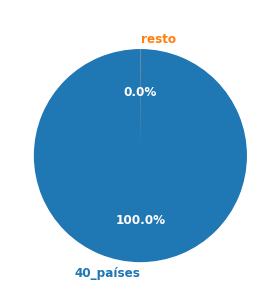

In [26]:
patches, texts, pcts = plt.pie(conjunto,labels=conjunto.index,
        autopct='%.1f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': None},
        textprops={'size': 'large'},startangle=90);
plt.setp(pcts, color='white', fontweight='bold')
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
plt.tight_layout();
plt.title("Producción Energética Mundial",color="white");

Pues al final con este análisis hemos llegado a la conclusión que quizás no me merezca la pena estudiar el resto de países, sino solo estos cuarenta países

In [27]:
countries = prod_40.index
df_40 = df[df.Country.isin(countries)]
len(df_40.Country.unique())

40

In [28]:
df_40.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8186 entries, 0 to 43300
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GDP                      8186 non-null   float64
 1   Population               8186 non-null   float64
 2   Energy_production        8186 non-null   float64
 3   Energy_consumption       8186 non-null   float64
 4   CO2_emission             8186 non-null   float64
 5   per_capita_production    8186 non-null   float64
 6   Energy_intensity_by_GDP  8186 non-null   float64
 7   balance                  8186 non-null   float64
 8   eficiency                8186 non-null   float64
 9   energy_dependecy         8186 non-null   float64
 10  use_intensity_pc         8186 non-null   float64
 11  co2_pc                   8186 non-null   float64
 12  latitude                 7797 non-null   float64
 13  longitude                7797 non-null   float64
 14  Year                   

Veamos cuales son los países más contaminantes por unidad de btu producida:

In [29]:
menos_eficientes = df_40.groupby("Country")["eficiency"].mean().sort_values(ascending=False)
menos_eficientes

Country
Japan                    5249.481742
France                   4425.781383
Former Czechoslovakia    1366.439654
Germany                  1156.680761
Algeria                  1045.922180
Poland                    694.044900
South Africa              608.596788
Egypt                     473.364470
Argentina                 307.935117
Netherlands               214.297625
Uzbekistan                190.329764
Malaysia                  184.132825
Brazil                    122.980517
Ukraine                   119.882577
Former Yugoslavia          90.303887
United Kingdom             73.169917
India                      72.360563
Norway                     61.106630
United States              58.354358
China                      54.688561
Mexico                     48.024187
Iran                       46.831105
World                      44.215733
United Arab Emirates       43.761290
Australia                  42.041145
Kazakhstan                 37.937986
Nigeria                    32.

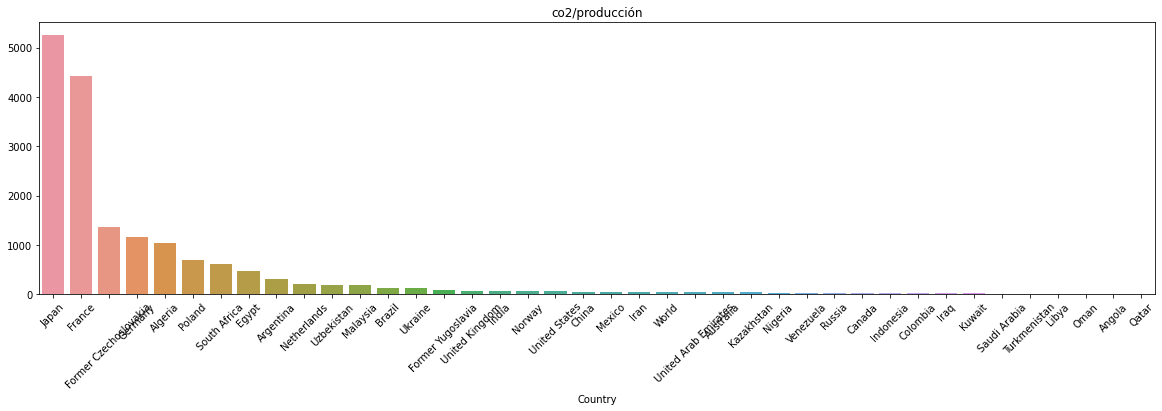

In [30]:
# Los representamos:
fig = plt.figure(figsize=(20,5))
sns.barplot(x=menos_eficientes.index,y=menos_eficientes.values)
plt.xticks(rotation=45)
plt.title("co2/producción")
plt.show()

Veamos cuales son los mayores productores de energía:

In [31]:
mayor_produccion = df_40.groupby(by="Country")["Energy_production"].mean().sort_values(ascending=False)

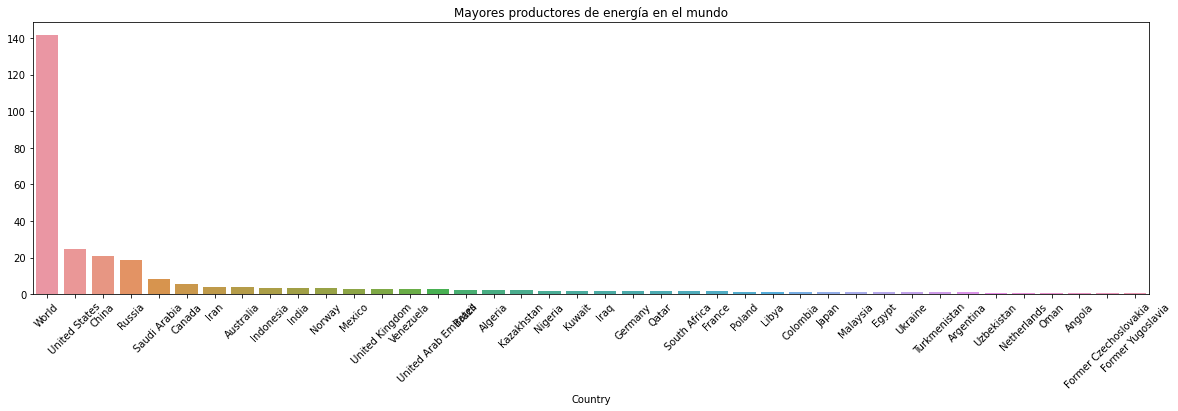

In [32]:
fig = plt.figure(figsize=(20,5))
sns.barplot(x=mayor_produccion.index,y=mayor_produccion.values)
plt.xticks(rotation=45)
plt.title("Mayores productores de energía en el mundo")
plt.show()

Veamos como se distribuye la energía producida por los países que más contaminan y los mayores productores de energía:

In [33]:
tipos_energia_países = df_40.groupby(["Country","Energy_type"])["Energy_production"].mean()
tipos_energia_países.index.get_level_values("Country").unique()

Index(['Algeria', 'Angola', 'Argentina', 'Australia', 'Brazil', 'Canada',
       'China', 'Colombia', 'Egypt', 'Former Czechoslovakia',
       'Former Yugoslavia', 'France', 'Germany', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Japan', 'Kazakhstan', 'Kuwait', 'Libya', 'Malaysia', 'Mexico',
       'Netherlands', 'Nigeria', 'Norway', 'Oman', 'Poland', 'Qatar', 'Russia',
       'Saudi Arabia', 'South Africa', 'Turkmenistan', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States', 'Uzbekistan',
       'Venezuela', 'World'],
      dtype='object', name='Country')

In [34]:
tipos_energia_países

Country  Energy_type              
Algeria  all_energy_types               5.632750
         coal                           0.000150
         natural_gas                    2.616900
         petroleum_n_other_liquids      3.012575
         renewables_n_other             0.003125
                                         ...    
World    coal                         117.677800
         natural_gas                   93.511425
         nuclear                       22.313175
         petroleum_n_other_liquids    153.970650
         renewables_n_other            36.788150
Name: Energy_production, Length: 220, dtype: float64

In [35]:
paises = list(mayor_produccion.nlargest(4)[1:].index) + list(menos_eficientes.nlargest(14).index)
paises

['United States',
 'China',
 'Russia',
 'Japan',
 'France',
 'Former Czechoslovakia',
 'Germany',
 'Algeria',
 'Poland',
 'South Africa',
 'Egypt',
 'Argentina',
 'Netherlands',
 'Uzbekistan',
 'Malaysia',
 'Brazil',
 'Ukraine']

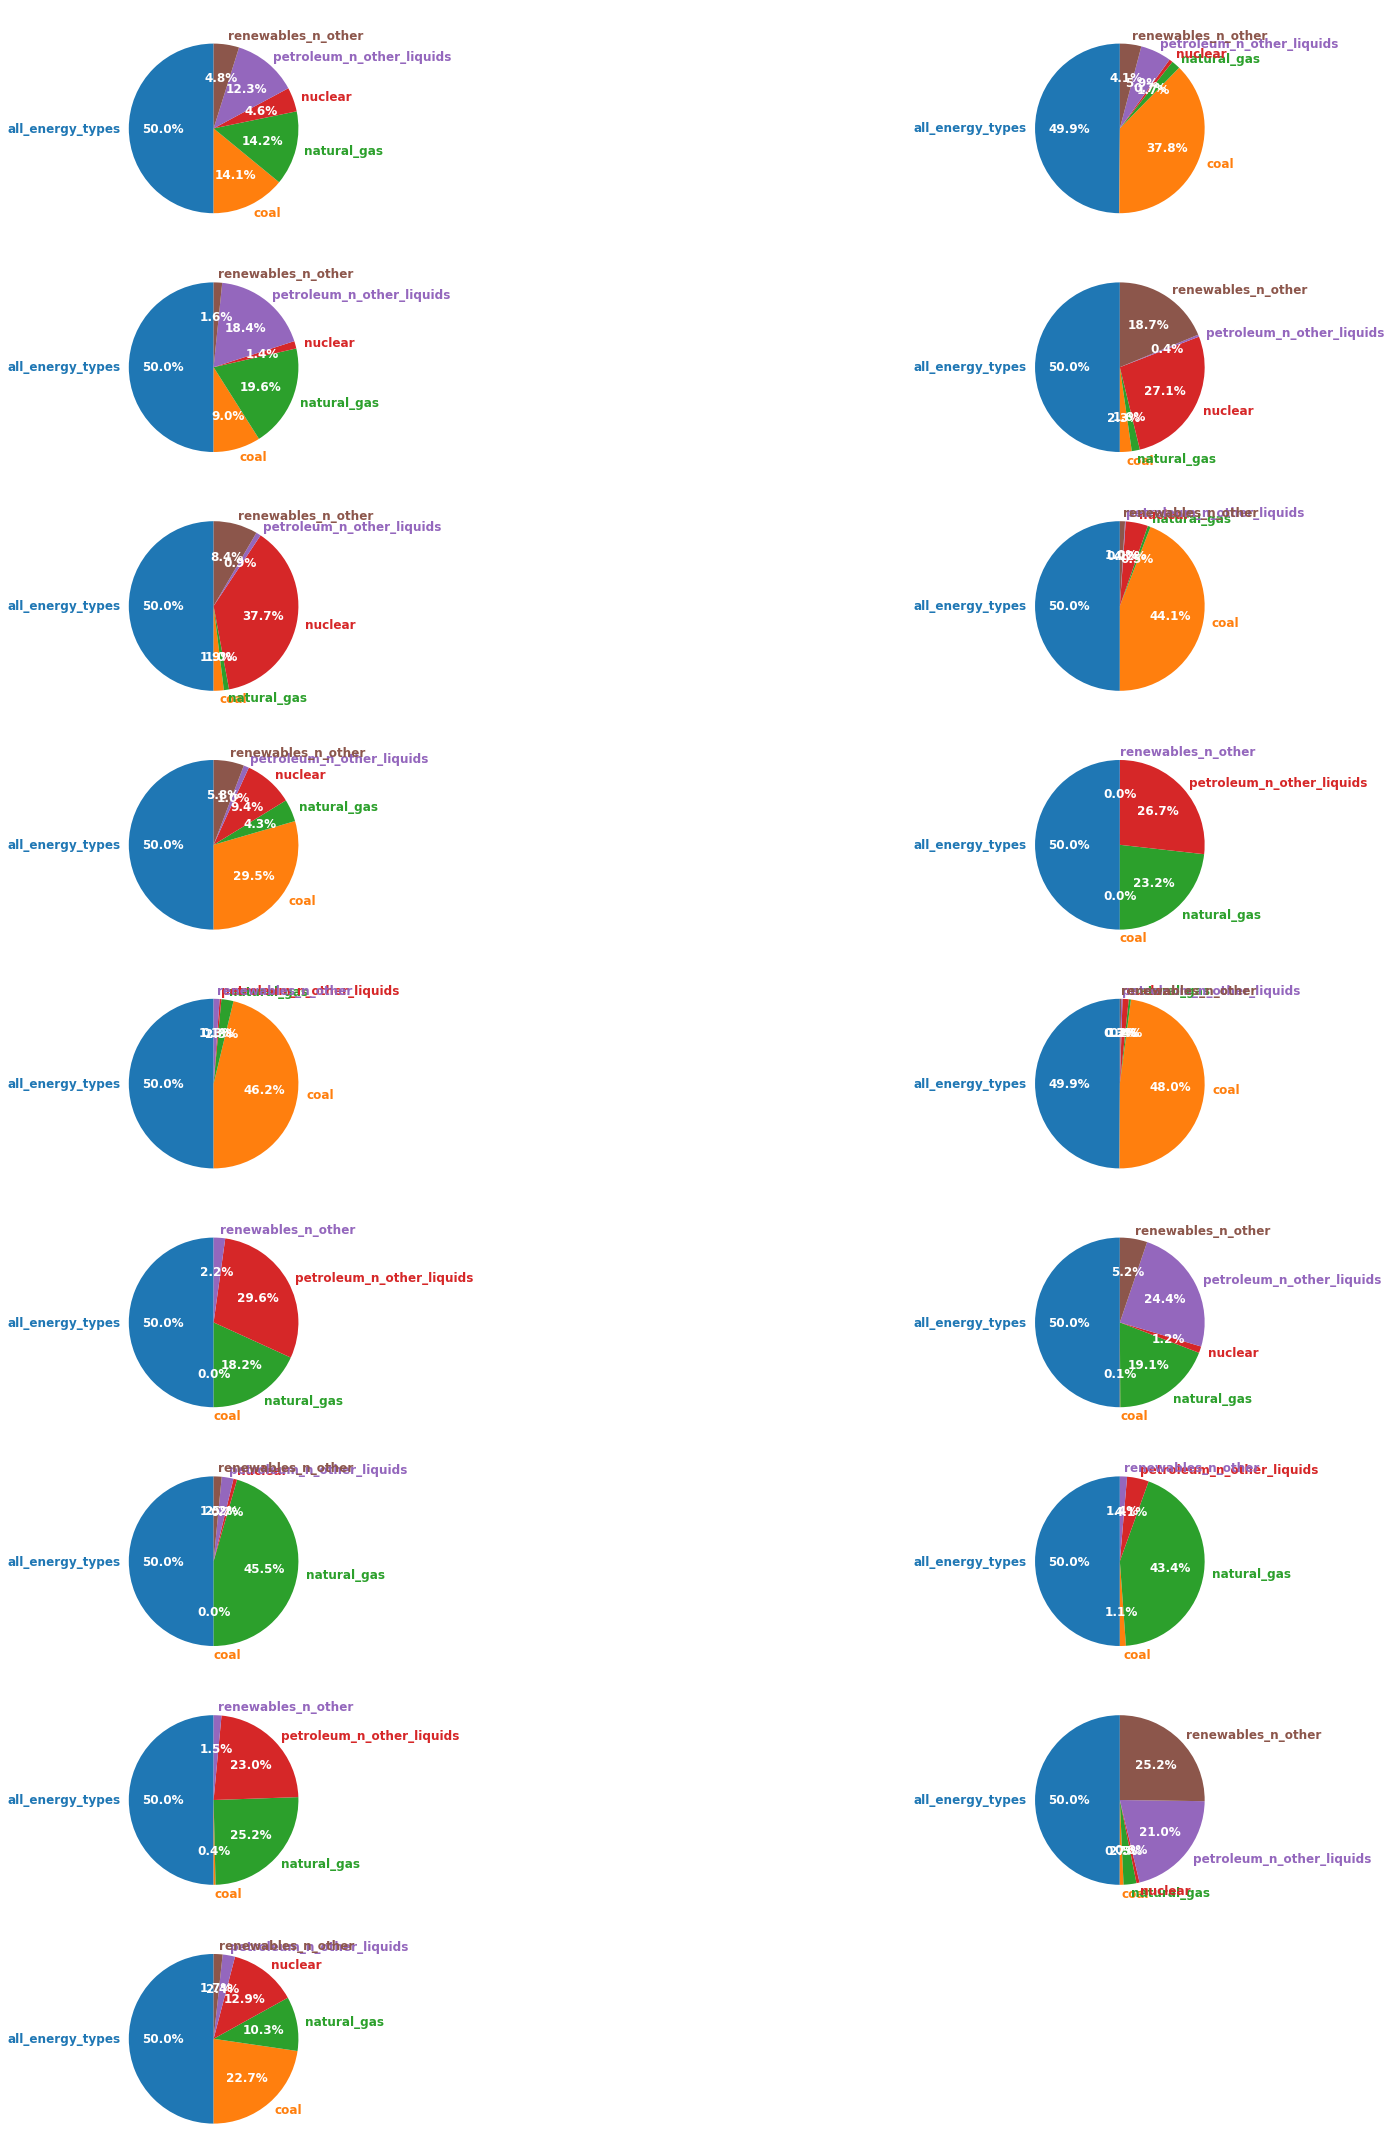

In [36]:
# Representamos gráficamente la producción de los países con más producción y de los más contaminantes del mundo:
fig = plt.figure(figsize=(30,30))
for i in range(len(paises)):
  ax = fig.add_subplot(9,2,i+1)

  patches, texts, pcts = plt.pie(tipos_energia_países[paises[i]],labels=tipos_energia_países[paises[i]].index,
          autopct='%.1f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': None},
          textprops={'size': 'large'},startangle=90)
  plt.setp(pcts, color='white', fontweight='bold')
  for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
  plt.setp(pcts, color='white')
  plt.setp(texts, fontweight=600)
  plt.tight_layout()
  plt.title("tipos de energía " + paises[i],color="white")

Vamos a eliminar el dato all_energy_types puesto que nos está desviartuando los gráficos y siempre que queramos saber el total solo tendríamos que sumarlos

In [37]:
df_40 = df_40.drop(df_40[df_40.Energy_type == "all_energy_types"].index)

In [38]:
tipos_energia_países = df_40.groupby(["Country","Energy_type"])["Energy_production"].mean()
tipos_energia_países.index.get_level_values("Country").unique()

Index(['Algeria', 'Angola', 'Argentina', 'Australia', 'Brazil', 'Canada',
       'China', 'Colombia', 'Egypt', 'Former Czechoslovakia',
       'Former Yugoslavia', 'France', 'Germany', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Japan', 'Kazakhstan', 'Kuwait', 'Libya', 'Malaysia', 'Mexico',
       'Netherlands', 'Nigeria', 'Norway', 'Oman', 'Poland', 'Qatar', 'Russia',
       'Saudi Arabia', 'South Africa', 'Turkmenistan', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States', 'Uzbekistan',
       'Venezuela', 'World'],
      dtype='object', name='Country')

In [39]:
tipos_energia_países

Country  Energy_type              
Algeria  coal                           0.000150
         natural_gas                    2.616900
         petroleum_n_other_liquids      3.012575
         renewables_n_other             0.003125
Angola   coal                           0.000000
                                         ...    
World    coal                         117.677800
         natural_gas                   93.511425
         nuclear                       22.313175
         petroleum_n_other_liquids    153.970650
         renewables_n_other            36.788150
Name: Energy_production, Length: 180, dtype: float64

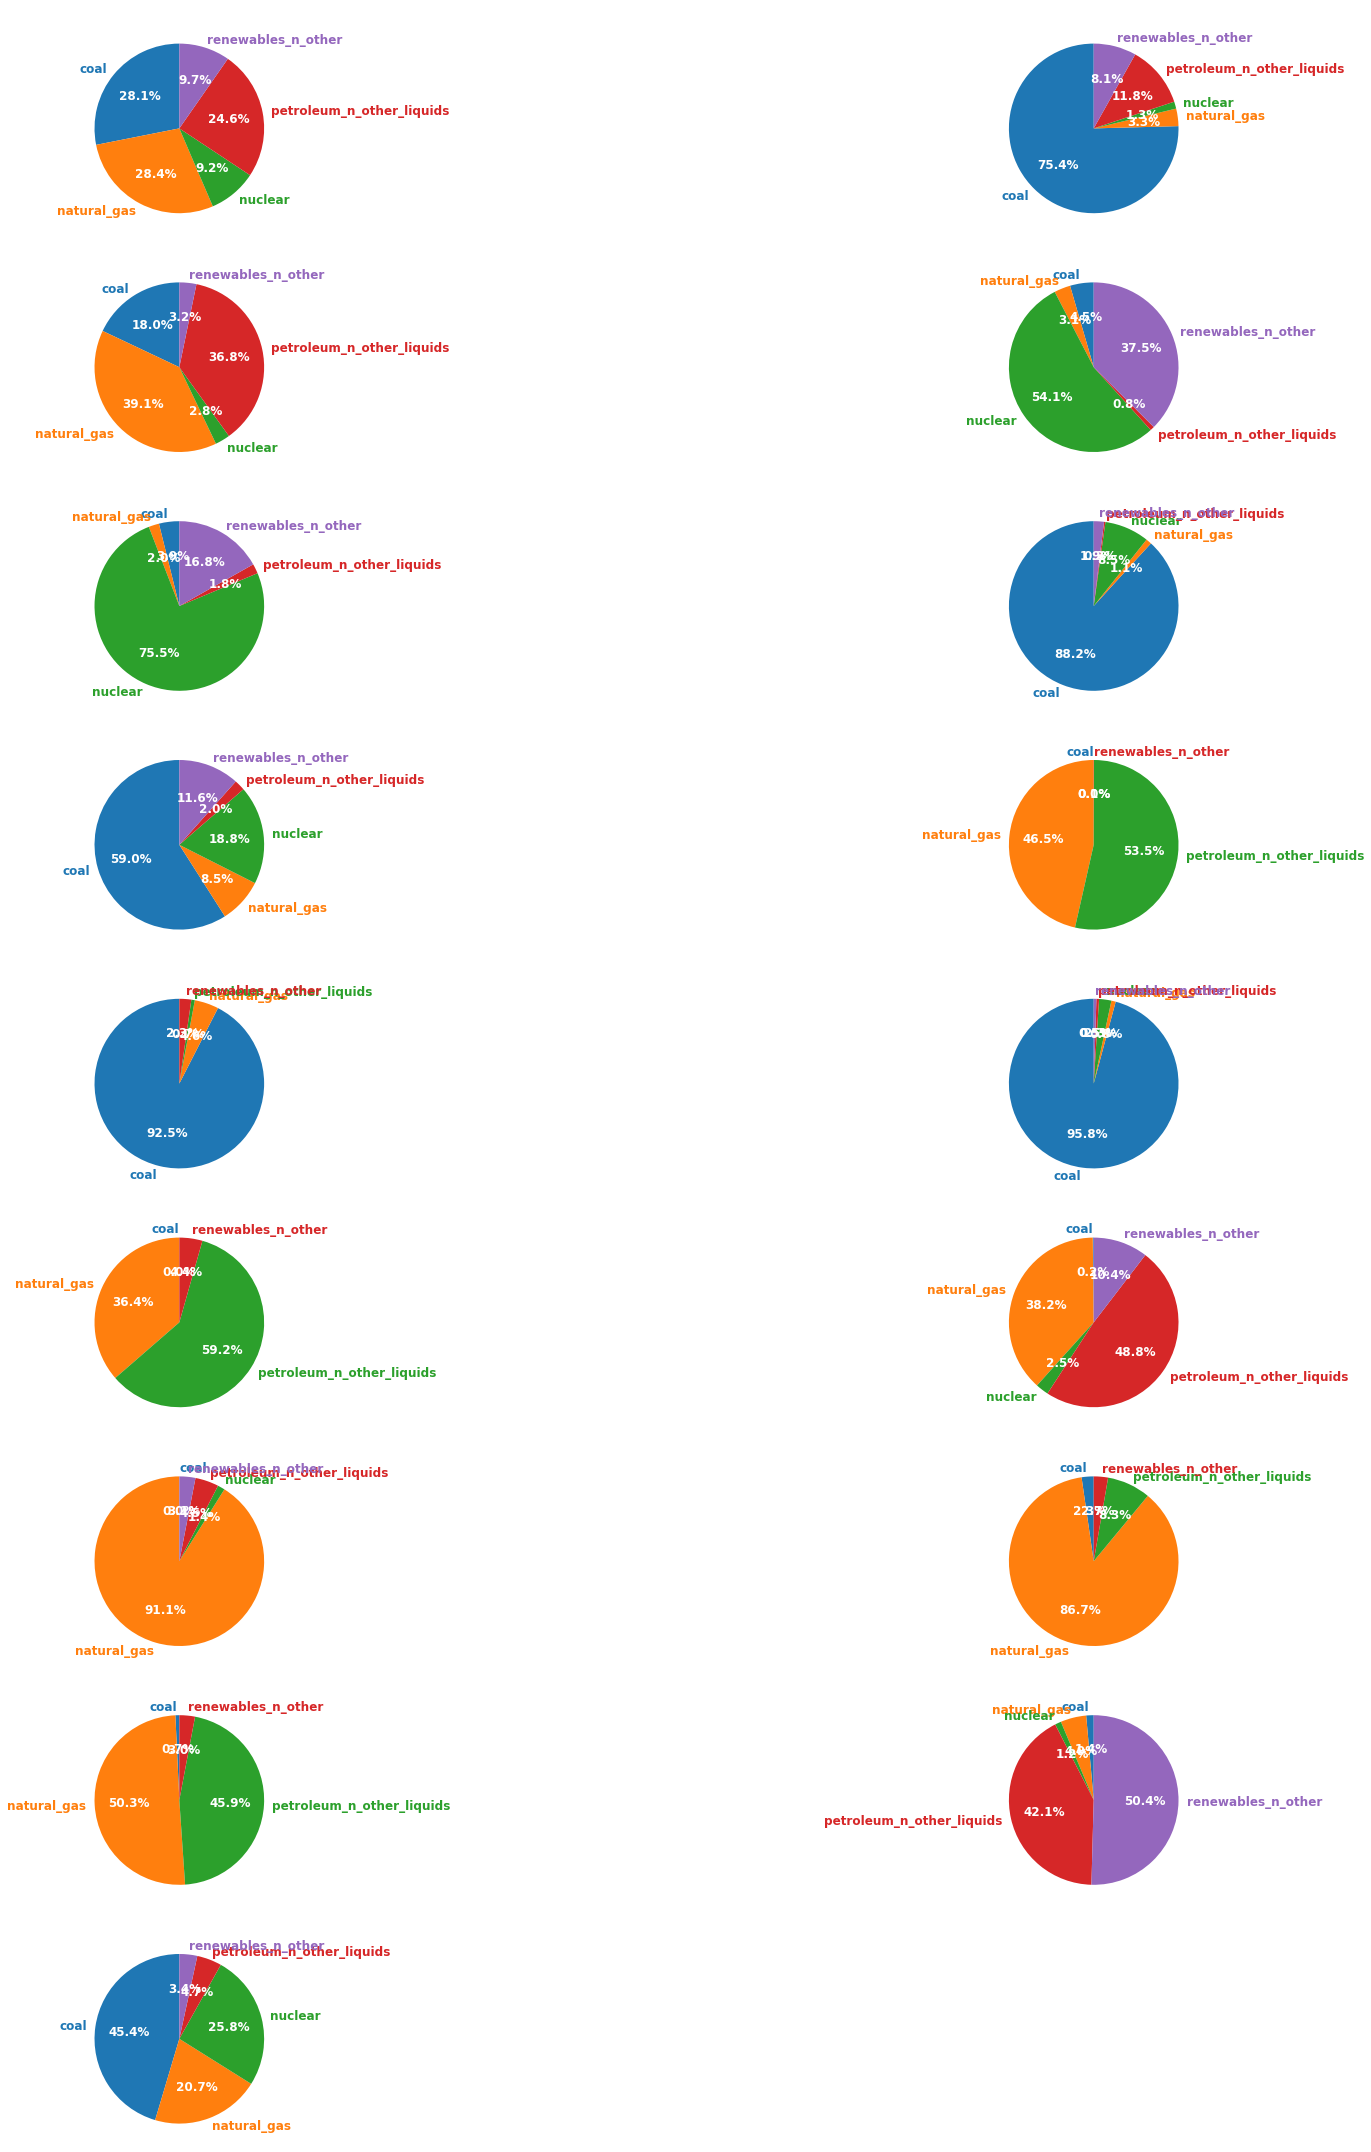

In [40]:
fig = plt.figure(figsize=(30,30))
for i in range(len(paises)):
  ax = fig.add_subplot(9,2,i+1)

  patches, texts, pcts = plt.pie(tipos_energia_países[paises[i]],labels=tipos_energia_países[paises[i]].index,
          autopct='%.1f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': None},
          textprops={'size': 'large'},startangle=90)
  plt.setp(pcts, color='white', fontweight='bold')
  plt.title("tipos de energía " + paises[i],color="white")
  for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
  plt.setp(pcts, color='white')
  plt.setp(texts, fontweight=600)
  plt.tight_layout()


In [41]:
gdp_40 = df_40.groupby(["Year","Country"])["GDP"].mean()
gdp_40_uns = gdp_40.unstack()
gdp_40_uns.head()

Country,Algeria,Angola,Argentina,Australia,Brazil,Canada,China,Colombia,Egypt,Former Czechoslovakia,...,Saudi Arabia,South Africa,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,United States,Uzbekistan,Venezuela,World
Year,,,,,,,,,,,,,,,,,,,,,
1980-01-01,0.5380,0.538,453.819,373.576,1305.131,693.884,684.621,686.93675,2.510,116.352,...,0.477,350.158,NaN,NaN,195.733,1275.974,7080.75,NaN,279.389,27770.910
1981-01-01,0.6190,0.619,430.090,389.006,1247.861,717.752,719.537,577.15475,2.527,117.835,...,0.433,368.929,NaN,NaN,201.377,1267.130,7260.45,NaN,278.376,28665.819
1982-01-01,0.6400,0.640,416.506,389.758,1255.116,694.875,784.295,626.85400,2.415,121.484,...,0.429,367.515,NaN,NaN,184.625,1292.103,7129.56,NaN,272.610,28801.770
1983-01-01,0.7070,0.707,433.632,387.233,1212.396,712.952,869.000,691.35550,125.211,125.211,...,0.431,360.728,NaN,NaN,179.814,1346.347,7456.38,NaN,266.744,29617.577
1984-01-01,7774.8675,0.739,442.301,413.144,1277.491,755.076,1001.087,939.58425,2.369,128.952,...,0.440,379.123,NaN,NaN,187.833,1376.515,7995.96,NaN,273.556,31097.253


In [42]:
px.line(data_frame=gdp_40_uns,x=gdp_40_uns.index,y=gdp_40_uns.columns[:len(gdp_40_uns)-1],title="Crecimiento de pib por países (ppp)")


Hemos visto que China es el segundo mayor productor de energía y que el 75 por ciento de ella proviene del carbón, además vemos que su PIB ha crecido de manera exponencial durante el periodo llegando a superar a los Estados Unidos que ha tenido un crecimiento lineal. Sin embargo, también hemos visto que China no es el país que emite más CO2 por tonelada de BTU de energía producida en media y esto no nos cuadra mucho con que la producción en su mayoría venga del carbón, estando Estados Unidos por delante de China, aunque muy parejos, teniendo este último un mix de generación más repartido entre fuentes. Por este motivo, pensamos que deberíamos mirar en vez de la media de co2 emitido por tonelada, la suma de co2 por tonelada para ver si se confirma este punto en el que China y Estados Unidos no son los que más contaminan y entre ambos la contaminación es parecida.

In [43]:
menos_eficientes = df_40.groupby("Country")["eficiency"].sum().sort_values(ascending=False)

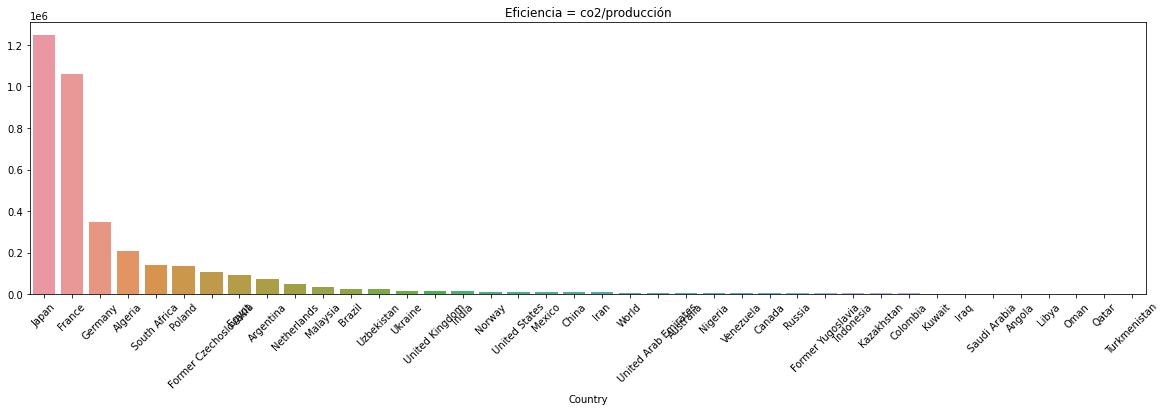

In [44]:
fig = plt.figure(figsize=(20,5))
sns.barplot(x=menos_eficientes.index,y=menos_eficientes.values)
plt.xticks(rotation=45)
plt.title("Eficiencia = co2/producción")
plt.show()

Vemos que las posiciones se mantienen relativamente estables si consideramos el total de co2 por tonelada emitido manteniendo China el puesto 20 y Estados Unidos subiendo al 18 por delante de ella. Veamos las emisiones de co2 en valor absoluto:

In [45]:
co2_absoluto = df_40.groupby("Country")["CO2_emission"].sum().sort_values(ascending=False)
co2_absoluto

Country
World                    1016796.858
United States             211603.865
China                     197778.559
Russia                     86842.093
Japan                      44240.176
India                      39905.319
Germany                    36498.061
United Kingdom             21626.385
Canada                     19625.259
France                     15297.885
South Africa               14997.974
Mexico                     14006.188
Poland                     13482.259
Iran                       13230.828
Australia                  12841.819
Saudi Arabia               12620.364
Brazil                     12520.879
Indonesia                  10004.269
Ukraine                     9362.079
United Arab Emirates        8707.803
Netherlands                 8441.189
Kazakhstan                  6425.581
Argentina                   5404.682
Egypt                       5215.874
Uzbekistan                  5091.609
Venezuela                   4739.046
Malaysia                    46

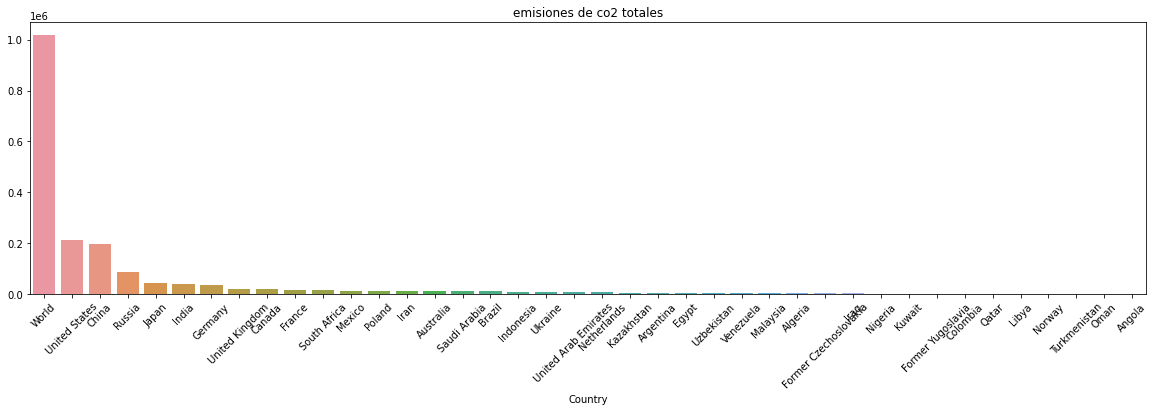

In [46]:
fig = plt.figure(figsize=(20,5))
sns.barplot(x=co2_absoluto.index,y=co2_absoluto.values)
plt.xticks(rotation=45)
plt.title("emisiones de co2 totales")
plt.show()

Viendo los valores absolutos podemos ver que en total China y Estados Unidos, a pesar de sus diferencias en el mix de energía usado para producirla, contaminan prácticamente lo mismo, estando Estados Unidos por delante de China, además por tonelada de btu de energía producida el mix de Estados Unidos contamina más que el de China por lo tanto podemos concluir que esta es una característica importante para el crecimiento de un país, pero el enfoque en el carbón no tiene pinta de que explique demasiado o al menos no tanto como pensabamos el crecimiento de China. Vamos a ver como ha sido la evolución de las energías usadas por China y Estados Unidos a lo largo del tiempo:

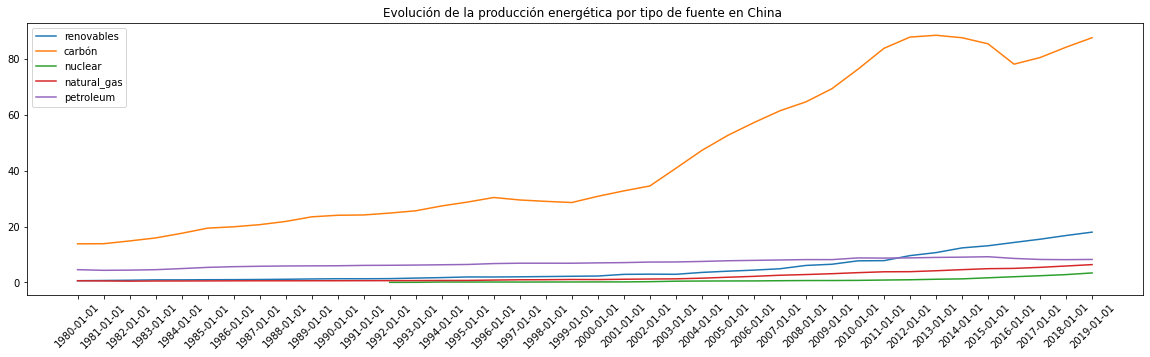

In [47]:
China_r = df_40[(df_40["Country"] == "China") & (df_40["Energy_type"] == "renewables_n_other")]
China_c = df_40[(df_40["Country"] == "China") & (df_40["Energy_type"] == "coal")]
China_n = df_40[(df_40["Country"] == "China") & (df_40["Energy_type"] == "nuclear")]
China_p = df_40[(df_40["Country"] == "China") & (df_40["Energy_type"] == "petroleum_n_other_liquids")]
China_g = df_40[(df_40["Country"] == "China") & (df_40["Energy_type"] == "natural_gas")]
China_r = China_r.reset_index()

fig = plt.figure(figsize=(20,5))
plt.plot(China_r.Year,China_r.Energy_production,label="renovables")
plt.plot(China_c.Year,China_c.Energy_production,label="carbón")
plt.plot(China_n.Year,China_n.Energy_production,label="nuclear")
plt.plot(China_g.Year,China_g.Energy_production,label="natural_gas")
plt.plot(China_p.Year,China_p.Energy_production,label="petroleum")
plt.legend()
plt.xticks(rotation=45)
plt.title("Evolución de la producción energética por tipo de fuente en China ")
plt.show()

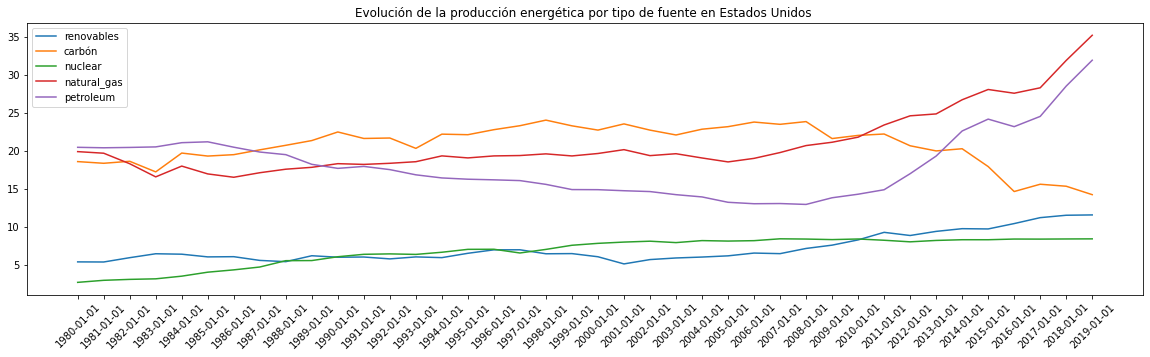

In [48]:
United_States_r = df_40[(df_40["Country"] == "United States") & (df_40["Energy_type"] == "renewables_n_other")]
United_States_c = df_40[(df_40["Country"] == "United States") & (df_40["Energy_type"] == "coal")]
United_States_n = df_40[(df_40["Country"] == "United States") & (df_40["Energy_type"] == "nuclear")]
United_States_p = df_40[(df_40["Country"] == "United States") & (df_40["Energy_type"] == "petroleum_n_other_liquids")]
United_States_g = df_40[(df_40["Country"] == "United States") & (df_40["Energy_type"] == "natural_gas")]
United_States_r = United_States_r.reset_index()

fig = plt.figure(figsize=(20,5))
plt.plot(United_States_r.Year,United_States_r.Energy_production,label="renovables")
plt.plot(United_States_c.Year,United_States_c.Energy_production,label="carbón")
plt.plot(United_States_n.Year,United_States_n.Energy_production,label="nuclear")
plt.plot(United_States_g.Year,United_States_g.Energy_production,label="natural_gas")
plt.plot(United_States_p.Year,United_States_p.Energy_production,label="petroleum")
plt.legend()
plt.xticks(rotation=45)
plt.title("Evolución de la producción energética por tipo de fuente en Estados Unidos ")
plt.show()

Vemos como China desde 1999, aunque no ha cambiado su modelo de producción energética, si que lo ha potenciado mucho lo que la ha ayudado a su fuerte crecimiento. Es decir, que el aumento tan grande de la producción con carbón puede ser consecuencia de cambios profundos en su estructura productiva nacional no cambiando su modelo de producción sino potenciandolo.
En el caso de Estados Unidos vemos que sí que a partir del año 2007 está llevando a cabo un cambio de su estructura productiva de energía ya que ha dejado de producir con carbón de manera importante y está potenciando fuertemente el gas natural y el petróleo, no así las renovables que vemos que su crecimiento es mucho más moderado

In [49]:
gdp_usa = gdp_40[:,"United States"]
gdp_usa = gdp_usa/1000
gdp_usa

Year
1980-01-01     7.08075
1981-01-01     7.26045
1982-01-01     7.12956
1983-01-01     7.45638
1984-01-01     7.99596
1985-01-01     8.32937
1986-01-01     8.61777
1987-01-01     8.91590
1988-01-01     9.28834
1989-01-01     9.62941
1990-01-01     9.81107
1991-01-01     9.80043
1992-01-01    10.14566
1993-01-01    10.42487
1994-01-01    10.84482
1995-01-01    11.13592
1996-01-01    11.55602
1997-01-01    12.06994
1998-01-01    12.61085
1999-01-01    13.21549
2000-01-01    13.75431
2001-01-01    13.88556
2002-01-01    14.12105
2003-01-01    14.51590
2004-01-01    15.07512
2005-01-01    15.60022
2006-01-01    16.03436
2007-01-01    16.35675
2008-01-01    16.37674
2009-01-01    15.95096
2010-01-01    16.38304
2011-01-01    16.63694
2012-01-01    17.01641
2013-01-01    17.32982
2014-01-01    17.72625
2015-01-01    18.20603
2016-01-01    18.50963
2017-01-01    18.92711
2018-01-01    19.47958
2019-01-01    19.92543
Name: GDP, dtype: float64

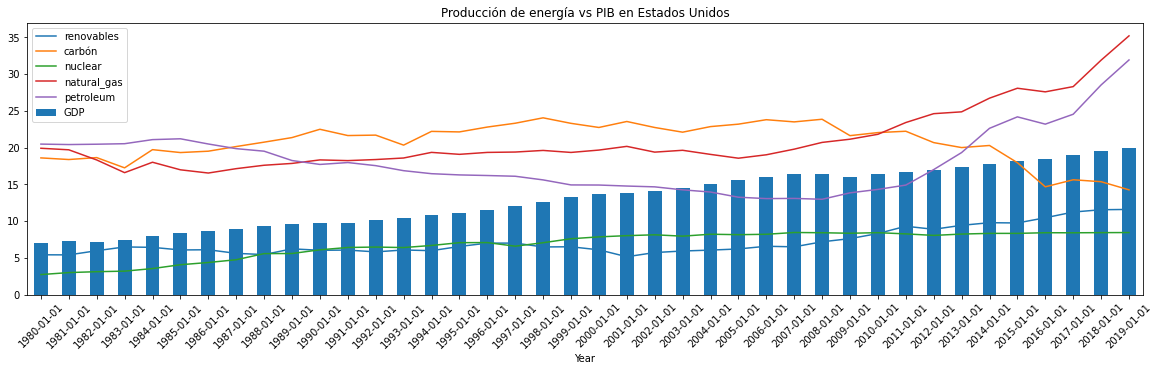

In [50]:
fig = plt.figure(figsize=(20,5))
gdp_usa.plot(kind="bar")
plt.plot(United_States_r.Year,United_States_r.Energy_production,label="renovables")
plt.plot(United_States_c.Year,United_States_c.Energy_production,label="carbón")
plt.plot(United_States_n.Year,United_States_n.Energy_production,label="nuclear")
plt.plot(United_States_g.Year,United_States_g.Energy_production,label="natural_gas")
plt.plot(United_States_p.Year,United_States_p.Energy_production,label="petroleum")
plt.legend()
plt.xticks(rotation=45)
plt.title("Producción de energía vs PIB en Estados Unidos")
plt.show()

In [131]:
gdp_china = gdp_40[:,"China"]
gdp_china = gdp_china/1000

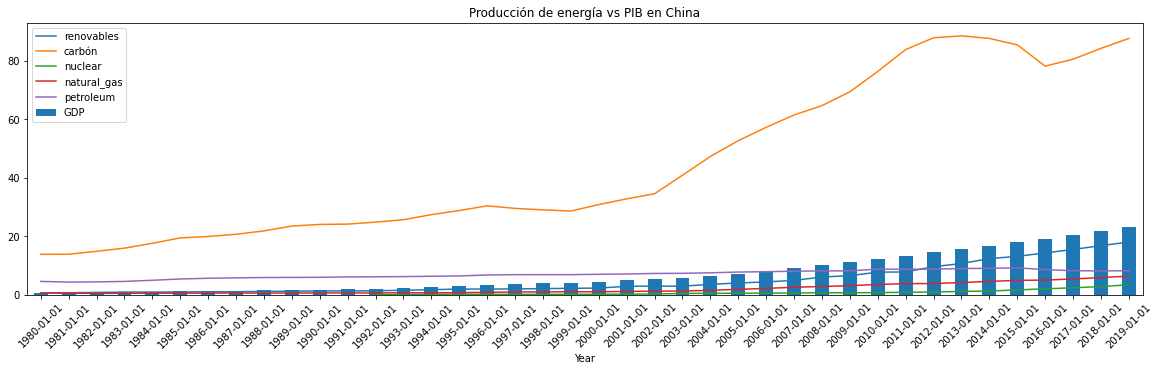

In [132]:
fig = plt.figure(figsize=(20,5))
gdp_china.plot(kind="bar")
plt.plot(China_r.Year,China_r.Energy_production,label="renovables")
plt.plot(China_c.Year,China_c.Energy_production,label="carbón")
plt.plot(China_n.Year,China_n.Energy_production,label="nuclear")
plt.plot(China_g.Year,China_g.Energy_production,label="natural_gas")
plt.plot(China_p.Year,China_p.Energy_production,label="petroleum")
plt.legend()
plt.xticks(rotation=45)
plt.title("Producción de energía vs PIB en China")
plt.show()

En el caso de Estados Unidos podemos apreciar que cuando inicia el cambio de producción empieza a crecer a un ratio inferior al que lo venía haciendo, sin embargo en el caso de china parece un crecimiento bastante estable. Veamos cuales han sido los crecimientos medios anuales para ambas economías antes y después de los puntos de cambio en la producción energética

In [129]:
gdp_usa

Year
1980-01-01     7.08075
1981-01-01     7.26045
1982-01-01     7.12956
1983-01-01     7.45638
1984-01-01     7.99596
1985-01-01     8.32937
1986-01-01     8.61777
1987-01-01     8.91590
1988-01-01     9.28834
1989-01-01     9.62941
1990-01-01     9.81107
1991-01-01     9.80043
1992-01-01    10.14566
1993-01-01    10.42487
1994-01-01    10.84482
1995-01-01    11.13592
1996-01-01    11.55602
1997-01-01    12.06994
1998-01-01    12.61085
1999-01-01    13.21549
2000-01-01    13.75431
2001-01-01    13.88556
2002-01-01    14.12105
2003-01-01    14.51590
2004-01-01    15.07512
2005-01-01    15.60022
2006-01-01    16.03436
2007-01-01    16.35675
2008-01-01    16.37674
2009-01-01    15.95096
2010-01-01    16.38304
2011-01-01    16.63694
2012-01-01    17.01641
2013-01-01    17.32982
2014-01-01    17.72625
2015-01-01    18.20603
2016-01-01    18.50963
2017-01-01    18.92711
2018-01-01    19.47958
2019-01-01    19.92543
Name: GDP, dtype: float64

In [53]:
# Estados Unidos:
gdp_2007 = round(gdp_usa["2007-01-01"]*1000,2)
gdp_1980 = gdp_usa["1980-01-01"]*1000
gdp_2019 = gdp_usa["2019-01-01"]*1000
ratio_us_07_80 = round(((gdp_2007/gdp_1980)**(1/(2007-1980))-1)*100,3)
ratio_us_19_07 = round(((gdp_2019/gdp_2007)**(1/(2019-2007))-1)*100,3)

print(f"el pib de Estados Unidos en 1980 era de {gdp_1980} ppp")
print(f"el pib de Estados Unidos en el 2007 era de {gdp_2007} ppp")
print(f"el pib de Estados Unidos en 2019 era de {gdp_2019} ppp")
print(f"El crecimiento real del pib de Estados Unidos en el periodo 1980-2007 fue de {ratio_us_07_80} %")
print(f"El crecimiento real del pib de Estados Unidos en el periodo 2007-2019 fue de {ratio_us_19_07} %")

el pib de Estados Unidos en 1980 era de 7080.75 ppp
el pib de Estados Unidos en el 2007 era de 16356.75 ppp
el pib de Estados Unidos en 2019 era de 19925.43 ppp
El crecimiento real del pib de Estados Unidos en el periodo 1980-2007 fue de 3.15 %
El crecimiento real del pib de Estados Unidos en el periodo 2007-2019 fue de 1.658 %


In [133]:
gdp_china

Year
1980-01-01     0.684621
1981-01-01     0.719537
1982-01-01     0.784295
1983-01-01     0.869000
1984-01-01     1.001087
1985-01-01     1.135233
1986-01-01     1.236269
1987-01-01     1.380912
1988-01-01     1.535574
1989-01-01     1.600068
1990-01-01     1.662471
1991-01-01     1.817081
1992-01-01     2.076477
1993-01-01     2.364808
1994-01-01     2.672970
1995-01-01     2.966261
1996-01-01     3.260692
1997-01-01     3.562269
1998-01-01     3.842142
1999-01-01     4.137363
2000-01-01     4.487852
2001-01-01     4.861350
2002-01-01     5.304420
2003-01-01     5.836300
2004-01-01     6.426520
2005-01-01     7.158480
2006-01-01     8.068150
2007-01-01     9.217340
2008-01-01    10.101810
2009-01-01    11.055130
2010-01-01    12.228770
2011-01-01    13.396890
2012-01-01    14.448430
2013-01-01    15.571280
2014-01-01    16.722210
2015-01-01    17.895850
2016-01-01    19.121770
2017-01-01    20.444710
2018-01-01    21.822110
2019-01-01    23.128340
Name: GDP, dtype: float64

Parece ser que pudo tener influencia pero hay que tener en cuenta la crisis que hubo en medio del 2008 que según vemos en los gráficos tampoco hizo demasiada mella en el poder adquisitivo de los estadounidenses en su conjunto

In [134]:
# China:
gdp_1999_ch = gdp_china["1999-01-01"]*1000
gdp_1980_ch = gdp_china["1980-01-01"]*1000
gdp_2019_ch = gdp_china["2019-01-01"]*1000
ratio_ch_99_80 = round(((gdp_1999_ch/gdp_1980_ch)**(1/(1999-1980))-1)*100,3)
ratio_ch_19_99 = round(((gdp_2019_ch/gdp_1999_ch)**(1/(2019-1999))-1)*100,3)

print(f"el pib de China en 1980 era de {gdp_1980_ch} ppp")
print(f"el pib de China en el 1999 era de {gdp_1999_ch} ppp")
print(f"el pib de China en 2019 era de {gdp_2019_ch} ppp")
print(f"El crecimiento real del pib de China en el periodo 1980-1999 fue de {ratio_ch_99_80} %")
print(f"El crecimiento real del pib de China en el periodo 1999-2019 fue de {ratio_ch_19_99} %")

el pib de China en 1980 era de 684.621 ppp
el pib de China en el 1999 era de 4137.363 ppp
el pib de China en 2019 era de 23128.34 ppp
El crecimiento real del pib de China en el periodo 1980-1999 fue de 9.931 %
El crecimiento real del pib de China en el periodo 1999-2019 fue de 8.986 %


Lo que si podemos apreciar es que desde 1980 y hasta 1999 China crecía más o menos al mismo ritmo que Estados Unidos, sin embargo a partir de 1999 empieza a crecer a un ritmo algo inferior cuando se produce el aumento del uso del carbón. Por otra parte, Estados Unidos mantiene el crecimiento hasta el 2007 pero en este momento empieza a crecer a un ritmo menor de lo que lo hace China lo que lleva a que China termine superando a Estados Unidos en GDP en términos constantes de ppp. Veamos que relación tienen el GDP y la producción de energía con un scatterplot:

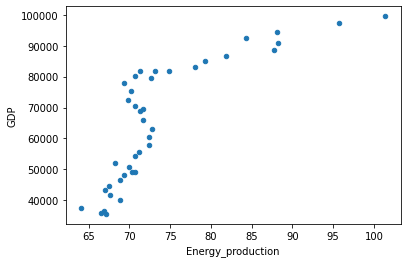

In [55]:
uno = df_40.loc[df_40.Country == "United States",["Year","GDP","Energy_production"]]
dos = uno.groupby("Year").sum()
dos.plot.scatter(x="Energy_production",y="GDP");

In [56]:
dos.corr(method="pearson")

,GDP,Energy_production
GDP,1.000000,0.795312
Energy_production,0.795312,1.000000


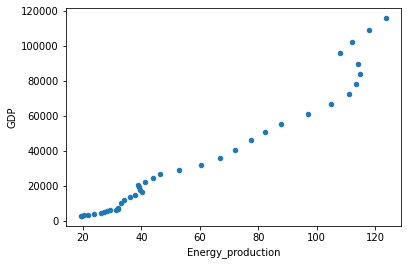

In [57]:
uno_china = df_40.loc[df_40.Country == "China",["Year","GDP","Energy_production"]]
dos_china = uno_china.groupby("Year").sum()
dos_china.plot.scatter(x="Energy_production",y="GDP");

In [58]:
dos_china.corr(method="pearson")

,GDP,Energy_production
GDP,1.000000,0.976682
Energy_production,0.976682,1.000000


## CONTRASTE DE HIPÓTESIS

### Contraste de hipótesis: Estados Unidos

Vamos a ver a través de un contrateste de hipótesis t-test pareado si efectivamente existe algo interesante que estudiar, o dicho de otra manera, si las medias del periodo de 1980-1999, en el caso de China, y de 1980-2007, en el de Estados Unidos, son diferentes a sus respectivas medias en el periodo de 2000-2019 y 2008-2019 respectivamente:

In [59]:
# Estados Unidos:
datos_us_gdp = df_40.groupby(["Country","Year"])["GDP"].sum()
datos_us_96_07_gdp = datos_us_gdp["United States"]["1996-01-01":"2007-01-01"].values
datos_us_08_19_gdp = datos_us_gdp["United States"]["2008-01-01":"2019-01-01"].values

In [60]:
print(len(datos_us_96_07_gdp),len(datos_us_08_19_gdp))

12 12


In [61]:
print(datos_us_96_07_gdp.mean(),datos_us_08_19_gdp.mean())

70331.4875 88528.30833333335


In [62]:
import scipy.stats as stats
stats.ttest_rel(a = datos_us_96_07_gdp,
                b = datos_us_08_19_gdp)

Ttest_relResult(statistic=-30.450349119550864, pvalue=5.66926347973168e-12)

Com el p-value es menor que alfa=0.05 podemos decir que sí ha ocurrido algo que merezca la pena estudiar en el pib de Estados Unidos a partir del año 2007. Vamos a realizar el mismo test para la producción de energía:

In [63]:
datos_us_eprod = df_40.groupby(["Country","Year"])["Energy_production"].sum()
datos_us_96_07_eprod = datos_us_eprod["United States"]["1996-01-01":"2007-01-01"].values
datos_us_08_19_eprod = datos_us_eprod["United States"]["2008-01-01":"2019-01-01"].values
print(len(datos_us_96_07_eprod),len(datos_us_08_19_eprod))
print(datos_us_96_07_eprod.mean(),datos_us_08_19_eprod.mean())
stats.ttest_rel(a = datos_us_96_07_eprod,
                b = datos_us_08_19_eprod)

12 12
71.20125 83.78825000000002


Ttest_relResult(statistic=-4.514581283343113, pvalue=0.0008798452929901086)

Lo mismo podemos decir en la producción de energía para ambos periodos y por tanto es muy probable que el cambio en el mix productivo de la energía de Estados Unidos haya tenido algún efecto en el crecimiento del pib. Vamos a ver lo mismo con las emisiones de co2:

In [64]:
datos_us_co2 = df_40.groupby(["Country","Year"])["CO2_emission"].sum()
datos_us_96_07_co2 = datos_us_co2["United States"]["1996-01-01":"2007-01-01"].values
datos_us_08_19_co2 = datos_us_co2["United States"]["2008-01-01":"2019-01-01"].values
print(len(datos_us_96_07_co2),len(datos_us_08_19_co2))
print(datos_us_96_07_co2.mean(),datos_us_08_19_co2.mean())
stats.ttest_rel(a = datos_us_96_07_co2,
                b = datos_us_08_19_co2)

12 12
5755.959583333332 5428.300333333334


Ttest_relResult(statistic=2.4265877593850185, pvalue=0.03361231406200629)

Igualmente el test nos indica que hay algo relevante que ha ocurrido entre los periodos que hace las medias diferentes y por tanto confirma que el cambio en el mix ha tenido un efecto en las emisiones de co2

### Contraste de hipótesis: China

In [76]:
datos_ch_gdp = df_40.groupby(["Country","Year"])["GDP"].sum()
datos_ch_80_99_gdp = datos_us_gdp["China"]["1980-01-01":"1999-01-01"].values
datos_ch_00_19_gdp = datos_us_gdp["China"]["2000-01-01":"2019-01-01"].values
print(len(datos_ch_80_99_gdp),len(datos_ch_00_19_gdp))
print(datos_ch_80_99_gdp.mean(),datos_ch_00_19_gdp.mean())

20 20
9105.9751 61824.42799999999


In [77]:
stats.ttest_rel(a = datos_ch_80_99_gdp,
                b = datos_ch_00_19_gdp)

Ttest_relResult(statistic=-9.695000717431355, pvalue=8.647766543949e-09)

Como el p-value es menor que alfa=0.05 podemos decir que sí ha ocurrido algo que merezca la pena estudiar en el pib de China a partir del año 1999. Vamos a realizar el mismo test para la producción de energía:

In [78]:
datos_ch_eprod = df_40.groupby(["Country","Year"])["Energy_production"].sum()
datos_ch_80_99_eprod = datos_ch_eprod["China"]["1980-01-01":"1999-01-01"].values
datos_ch_00_19_eprod = datos_ch_eprod["China"]["2000-01-01":"2019-01-01"].values
print(len(datos_ch_80_99_eprod),len(datos_ch_00_19_eprod))
print(datos_ch_80_99_eprod.mean(),datos_ch_00_19_eprod.mean())
stats.ttest_rel(a = datos_ch_80_99_eprod,
                b = datos_ch_00_19_eprod)

20 20
30.47765 87.40790000000001


Ttest_relResult(statistic=-11.989298850617669, pvalue=2.6302265795209493e-10)

Lo mismo podemos decir en la producción de energía para ambos periodos y por tanto es muy probable que el cambio en el mix productivo de la energía de China haya tenido algún efecto en el crecimiento del pib. Vamos a ver lo mismo con las emisiones de co2:

In [79]:
datos_ch_co2 = df_40.groupby(["Country","Year"])["CO2_emission"].sum()
datos_ch_80_99_co2 = datos_ch_co2["China"]["1980-01-01":"1999-01-01"].values
datos_ch_00_19_co2 = datos_us_co2["China"]["2000-01-01":"2019-01-01"].values
print(len(datos_ch_80_99_co2),len(datos_ch_00_19_co2))
print(datos_ch_80_99_co2.mean(),datos_ch_00_19_co2.mean())
stats.ttest_rel(a = datos_ch_80_99_co2,
                b = datos_ch_00_19_co2)

20 20
2279.83545 7609.092500000001


Ttest_relResult(statistic=-10.88955733355591, pvalue=1.3112159048240634e-09)

Igualmente el test nos indica que hay algo relevante que ha ocurrido entre los periodos que hace las medias diferentes y por tanto confirma que el cambio en el mix ha tenido un efecto en las emisiones de co2

### Correlaciones

Veamos como se correlacionan todas las variables de nuestro dataframe entre sí:

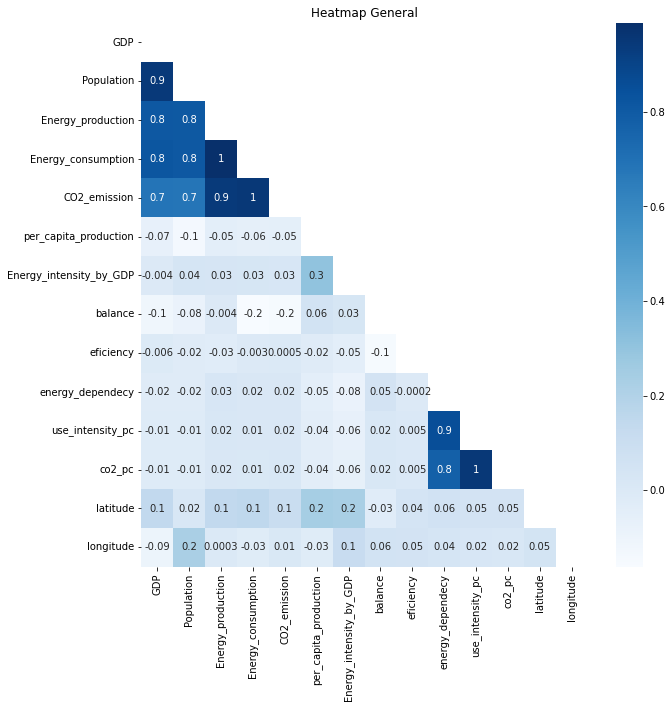

In [137]:
fig = plt.figure(figsize=(10,10))
corr = df_40.corr(method="pearson")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,annot=True,fmt='.1g',mask=mask, cmap="Blues")
plt.title("Heatmap General")
plt.show()

In [89]:
# Veamos las correlaciones de las variables Chinas:
df_china = df_40.loc[df_40.Country == "China",:]
df_china_grouped = df_china.groupby("Year").sum()
df_china_grouped.corr(method="pearson")

,GDP,Population,Energy_production,Energy_consumption,CO2_emission,per_capita_production,Energy_intensity_by_GDP,balance,eficiency,energy_dependecy,use_intensity_pc,co2_pc,latitude,longitude
GDP,1.000000,0.766956,0.976682,0.984844,0.974642,0.980473,-0.766217,-0.984105,0.891690,-0.720509,NaN,0.943972,0.593668,0.593668
Population,0.766956,1.000000,0.796519,0.776793,0.782117,0.799055,-0.932134,-0.692248,0.708958,-0.957458,NaN,0.770465,0.958867,0.958867
Energy_production,0.976682,0.796519,1.000000,0.997990,0.995007,0.998312,-0.785282,-0.964254,0.868684,-0.740199,NaN,0.985229,0.623140,0.623140
Energy_consumption,0.984844,0.776793,0.997990,1.000000,0.994732,0.998852,-0.764538,-0.979107,0.874248,-0.717842,NaN,0.980581,0.600629,0.600629
CO2_emission,0.974642,0.782117,0.995007,0.994732,1.000000,0.993827,-0.780370,-0.966656,0.898650,-0.732844,NaN,0.985642,0.605492,0.605492
per_capita_production,0.980473,0.799055,0.998312,0.998852,0.993827,1.000000,-0.774453,-0.973273,0.868139,-0.733072,NaN,0.980921,0.632377,0.632377
Energy_intensity_by_GDP,-0.766217,-0.932134,-0.785282,-0.764538,-0.780370,-0.774453,1.000000,0.677059,-0.761943,0.987132,NaN,-0.773576,-0.823378,-0.823378
balance,-0.984105,-0.692248,-0.964254,-0.979107,-0.966656,-0.973273,0.677059,1.000000,-0.868195,0.626462,NaN,-0.938858,-0.511966,-0.511966
eficiency,0.891690,0.708958,0.868684,0.874248,0.898650,0.868139,-0.761943,-0.868195,1.000000,-0.714142,NaN,0.865917,0.541370,0.541370
energy_dependecy,-0.720509,-0.957458,-0.740199,-0.717842,-0.732844,-0.733072,0.987132,0.626462,-0.714142,1.000000,NaN,-0.723830,-0.886250,-0.886250


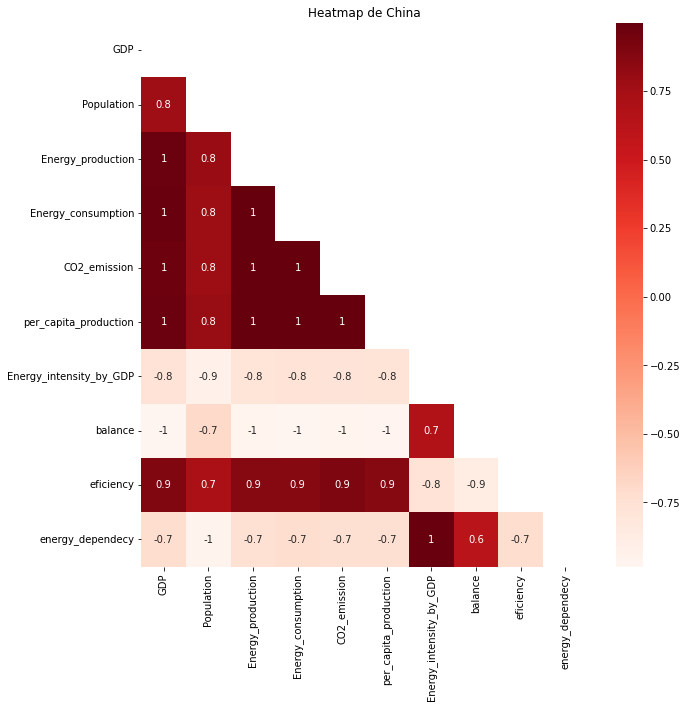

In [127]:
fig = plt.figure(figsize=(10,10))
corr = df_china_grouped.loc[:,:"energy_dependecy"].corr(method="pearson")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,annot=True,fmt='.1g',mask=mask, cmap="Reds")
plt.title("Heatmap de China")
plt.show()

In [91]:
# Veamos las correlaciones de las variables estadounidenses:
df_usa = df_40.loc[df_40.Country == "United States",:]
df_usa_grouped = df_usa.groupby("Year").sum()
df_usa_grouped.corr(method="pearson")

,GDP,Population,Energy_production,Energy_consumption,CO2_emission,per_capita_production,Energy_intensity_by_GDP,balance,eficiency,energy_dependecy,use_intensity_pc,co2_pc,latitude,longitude
GDP,1.000000,0.996672,0.795312,0.920307,0.660517,-0.489518,-0.986444,-0.257299,0.261830,-0.915380,NaN,-0.645830,NaN,NaN
Population,0.996672,1.000000,0.790892,0.916403,0.654695,-0.505653,-0.987288,-0.257309,0.257633,-0.914339,NaN,-0.667571,NaN,NaN
Energy_production,0.795312,0.790892,1.000000,0.608403,0.173155,-0.630295,-0.744424,0.329351,-0.333452,-0.631816,NaN,-0.833713,NaN,NaN
Energy_consumption,0.920307,0.916403,0.608403,1.000000,0.849515,-0.119147,-0.915083,-0.548972,0.513024,-0.800928,NaN,-0.400271,NaN,NaN
CO2_emission,0.660517,0.654695,0.173155,0.849515,1.000000,0.194311,-0.670131,-0.828331,0.855625,-0.632357,NaN,0.074631,NaN,NaN
per_capita_production,-0.489518,-0.505653,-0.630295,-0.119147,0.194311,1.000000,0.480263,-0.522088,0.438187,0.556412,NaN,0.785863,NaN,NaN
Energy_intensity_by_GDP,-0.986444,-0.987288,-0.744424,-0.915083,-0.670131,0.480263,1.000000,0.304679,-0.301925,0.914866,NaN,0.637188,NaN,NaN
balance,-0.257299,-0.257309,0.329351,-0.548972,-0.828331,-0.522088,0.304679,1.000000,-0.961542,0.287447,NaN,-0.401851,NaN,NaN
eficiency,0.261830,0.257633,-0.333452,0.513024,0.855625,0.438187,-0.301925,-0.961542,1.000000,-0.349437,NaN,0.443005,NaN,NaN
energy_dependecy,-0.915380,-0.914339,-0.631816,-0.800928,-0.632357,0.556412,0.914866,0.287447,-0.349437,1.000000,NaN,0.567239,NaN,NaN


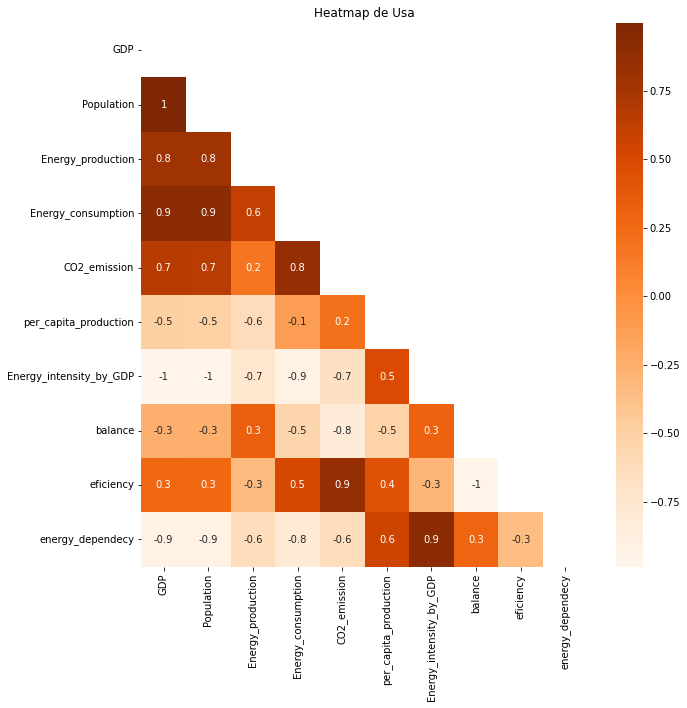

In [128]:
fig = plt.figure(figsize=(10,10))
corr = df_usa_grouped.loc[:,:"energy_dependecy"].corr(method="pearson")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,annot=True,fmt='.1g',mask=mask, cmap="Oranges")
plt.title("Heatmap de Usa")
plt.show()

### Limpiamos los datos del dataframe según lo hablado en la tutoría con Juan:

In [93]:
df_40.head()

,GDP,Population,Energy_production,Energy_consumption,CO2_emission,per_capita_production,Energy_intensity_by_GDP,balance,eficiency,energy_dependecy,use_intensity_pc,co2_pc,latitude,longitude,Year,Country,Energy_type,CODE_x,continent,geometry
1,27770.91,4298126.522,20.775,20.702,0.000,68.146,10.547,0.073,0.000,0.001,0.0,0.000,NaN,NaN,1980-01-01,World,renewables_n_other,None,NaN,NaN
2,27770.91,4298126.522,7.576,7.576,0.000,68.146,10.547,0.000,0.000,0.000,0.0,0.000,NaN,NaN,1980-01-01,World,nuclear,None,NaN,NaN
3,27770.91,4298126.522,133.111,132.064,2455.244,68.146,10.547,1.047,18.445,0.005,0.0,0.001,NaN,NaN,1980-01-01,World,petroleum_n_other_liquids,None,NaN,NaN
4,27770.91,4298126.522,54.761,53.865,1081.593,68.146,10.547,0.896,19.751,0.002,0.0,0.000,NaN,NaN,1980-01-01,World,natural_gas,None,NaN,NaN
5,27770.91,4298126.522,80.114,78.656,1409.790,68.146,10.547,1.458,17.597,0.003,0.0,0.000,NaN,NaN,1980-01-01,World,coal,None,NaN,NaN


In [94]:
# Eliminamos las filas que contienen la suma de "World", pues si la necesitamos podemos realizar la suma de las variables en su conjunto:

df_40_final = df_40.drop(df_40[df_40.Country == "World"].index)

In [95]:
df_40_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6478 entries, 2918 to 43299
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GDP                      6478 non-null   float64
 1   Population               6478 non-null   float64
 2   Energy_production        6478 non-null   float64
 3   Energy_consumption       6478 non-null   float64
 4   CO2_emission             6478 non-null   float64
 5   per_capita_production    6478 non-null   float64
 6   Energy_intensity_by_GDP  6478 non-null   float64
 7   balance                  6478 non-null   float64
 8   eficiency                6478 non-null   float64
 9   energy_dependecy         6478 non-null   float64
 10  use_intensity_pc         6478 non-null   float64
 11  co2_pc                   6478 non-null   float64
 12  latitude                 6354 non-null   float64
 13  longitude                6354 non-null   float64
 14  Year                

In [96]:
df_40_final.head(5)

,GDP,Population,Energy_production,Energy_consumption,CO2_emission,per_capita_production,Energy_intensity_by_GDP,balance,eficiency,energy_dependecy,use_intensity_pc,co2_pc,latitude,longitude,Year,Country,Energy_type,CODE_x,continent,geometry
2918,279.389,15182.60,0.150,0.155,0.0,104.341,5.670,-0.005,0.0,0.001,0.0,0.0,6.424,-66.59,1980-01-01,Venezuela,renewables_n_other,None,NaN,NaN
2919,279.389,15182.60,5.000,0.812,0.0,104.341,5.670,4.188,0.0,0.003,0.0,0.0,6.424,-66.59,1980-01-01,Venezuela,petroleum_n_other_liquids,None,NaN,NaN
2920,279.389,15182.60,0.616,0.616,0.0,104.341,5.670,0.000,0.0,0.002,0.0,0.0,6.424,-66.59,1980-01-01,Venezuela,natural_gas,None,NaN,NaN
2921,279.389,15182.60,0.001,0.002,0.0,104.341,5.670,-0.000,0.0,0.000,0.0,0.0,6.424,-66.59,1980-01-01,Venezuela,coal,None,NaN,NaN
2923,278.376,15597.88,0.156,0.161,0.0,110.257,6.178,-0.005,0.0,0.001,0.0,0.0,6.424,-66.59,1981-01-01,Venezuela,renewables_n_other,None,NaN,NaN


In [97]:
# Vemos que el indice no está bien por lo que lo vamos a resetear:
df_40_final = df_40_final.reset_index()
df_40_final = df_40_final.drop(columns="index")
df_40_final.head(5)

,GDP,Population,Energy_production,Energy_consumption,CO2_emission,per_capita_production,Energy_intensity_by_GDP,balance,eficiency,energy_dependecy,use_intensity_pc,co2_pc,latitude,longitude,Year,Country,Energy_type,CODE_x,continent,geometry
0,279.389,15182.60,0.150,0.155,0.0,104.341,5.670,-0.005,0.0,0.001,0.0,0.0,6.424,-66.59,1980-01-01,Venezuela,renewables_n_other,None,NaN,NaN
1,279.389,15182.60,5.000,0.812,0.0,104.341,5.670,4.188,0.0,0.003,0.0,0.0,6.424,-66.59,1980-01-01,Venezuela,petroleum_n_other_liquids,None,NaN,NaN
2,279.389,15182.60,0.616,0.616,0.0,104.341,5.670,0.000,0.0,0.002,0.0,0.0,6.424,-66.59,1980-01-01,Venezuela,natural_gas,None,NaN,NaN
3,279.389,15182.60,0.001,0.002,0.0,104.341,5.670,-0.000,0.0,0.000,0.0,0.0,6.424,-66.59,1980-01-01,Venezuela,coal,None,NaN,NaN
4,278.376,15597.88,0.156,0.161,0.0,110.257,6.178,-0.005,0.0,0.001,0.0,0.0,6.424,-66.59,1981-01-01,Venezuela,renewables_n_other,None,NaN,NaN


In [98]:
# Vemos a que países les falta el continente
continente_nulo = df_40_final[df_40_final.continent.isnull()]
sin_continente = continente_nulo.Country.unique()
asigna_continente =dict(zip(sin_continente,["South America","Africa","Asia","Europe","Europe","Europe","Europe"]))
sin_continente

array(['Venezuela', 'Iran', 'Russia', 'Former Czechoslovakia',
       'Former Yugoslavia', 'Norway', 'France'], dtype=object)

In [99]:
list(asigna_continente.keys())[0]

'Venezuela'

In [101]:
# Creamos una copia de seguridad:
df_40_final.to_csv("copia_df_40_final_v1.csv")

Creamos una función para poder cambiar o añadir datos en nuestro dataframe, pues nos faltan contienentes y datos de longitud y latitud:

In [107]:
import os
os.chdir(os.path.dirname("/Users/fersaol/Library/CloudStorage/OneDrive-Personal/Documentos/MIS_COSAS_DE_THE_BRIDGE/EDA/proyecto_co2/src/utils/funciones_co2.py"))

In [108]:
import funciones_co2 as fco2

In [109]:

fco2.reemplaza_valor(df_40_final,"Country","continent","South America","Africa","Asia","Europe","Europe","Europe","Europe")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6478 entries, 0 to 6477
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GDP                      6478 non-null   float64
 1   Population               6478 non-null   float64
 2   Energy_production        6478 non-null   float64
 3   Energy_consumption       6478 non-null   float64
 4   CO2_emission             6478 non-null   float64
 5   per_capita_production    6478 non-null   float64
 6   Energy_intensity_by_GDP  6478 non-null   float64
 7   balance                  6478 non-null   float64
 8   eficiency                6478 non-null   float64
 9   energy_dependecy         6478 non-null   float64
 10  use_intensity_pc         6478 non-null   float64
 11  co2_pc                   6478 non-null   float64
 12  latitude                 6354 non-null   float64
 13  longitude                6354 non-null   float64
 14  Year                    

Guardamos una copia de seguridad:

In [110]:
df_40_final.to_csv("df_40_final_v2.csv")

Vemos de quienes nos falta la latitud y la longitud

In [111]:
latitud_nula = df_40_final[df_40_final.latitude.isnull()]
sin_latitud = latitud_nula.Country.unique()
asigna_continente =dict(zip(sin_continente,["South America","Africa","Asia","Europe","Europe","Europe","Europe"]))
sin_latitud

array(['Former Czechoslovakia', 'Former Yugoslavia'], dtype=object)

In [112]:
longitud_nula = df_40_final[df_40_final.longitude.isnull()]
sin_longitud = longitud_nula.Country.unique()
asigna_continente =dict(zip(sin_continente,["South America","Africa","Asia","Europe","Europe","Europe","Europe"]))
sin_longitud

array(['Former Czechoslovakia', 'Former Yugoslavia'], dtype=object)

Estos dos países ya extintos los vamos a mantener con los nombres dados y con la coordenadas antiguas porque no son importantes en este estudio más allá de poderlos representar en el mapa y como contribución al continente europeo, dado que la división de los datos entre los diferentes países que integran estas formaciones durante los sucesivos años sería un esfuerzo que no nos reporta ningún o muy escaso beneficio para nuestro estudio

In [113]:
# Buscamos la longitud y la latitud de la república checa y de yugoslavia:
latitud_checa = 49.817492
longitud_checa = 15.472962
latitud_yugoslavia = 44.820556
longitud_yugoslavia = 20.462222

In [114]:
fco2.reemplaza_valor(df_40_final,"Country","latitude",latitud_checa,latitud_yugoslavia)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6478 entries, 0 to 6477
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GDP                      6478 non-null   float64
 1   Population               6478 non-null   float64
 2   Energy_production        6478 non-null   float64
 3   Energy_consumption       6478 non-null   float64
 4   CO2_emission             6478 non-null   float64
 5   per_capita_production    6478 non-null   float64
 6   Energy_intensity_by_GDP  6478 non-null   float64
 7   balance                  6478 non-null   float64
 8   eficiency                6478 non-null   float64
 9   energy_dependecy         6478 non-null   float64
 10  use_intensity_pc         6478 non-null   float64
 11  co2_pc                   6478 non-null   float64
 12  latitude                 6478 non-null   float64
 13  longitude                6354 non-null   float64
 14  Year                    

In [115]:
fco2.reemplaza_valor(df_40_final,"Country","longitude",longitud_checa,longitud_yugoslavia)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6478 entries, 0 to 6477
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GDP                      6478 non-null   float64
 1   Population               6478 non-null   float64
 2   Energy_production        6478 non-null   float64
 3   Energy_consumption       6478 non-null   float64
 4   CO2_emission             6478 non-null   float64
 5   per_capita_production    6478 non-null   float64
 6   Energy_intensity_by_GDP  6478 non-null   float64
 7   balance                  6478 non-null   float64
 8   eficiency                6478 non-null   float64
 9   energy_dependecy         6478 non-null   float64
 10  use_intensity_pc         6478 non-null   float64
 11  co2_pc                   6478 non-null   float64
 12  latitude                 6478 non-null   float64
 13  longitude                6478 non-null   float64
 14  Year                    

Comprobamos que ha funcionado bien con Yugoslavia:

In [116]:
df_40_final.loc[df_40_final.Country == "Former Yugoslavia",["latitude","longitude"]].nunique()

latitude     1
longitude    1
dtype: int64

In [117]:
df_40_final.loc[df_40_final.Country == "Former Yugoslavia",["latitude","longitude"]].head(1)

,latitude,longitude
594,44.820556,20.462222


In [118]:
# generamos una copia de seguridad del dataframe:
ruta_copias = "/Users/fersaol/Library/CloudStorage/OneDrive-Personal/Documentos/MIS_COSAS_DE_THE_BRIDGE/EDA/proyecto_co2/src/data/"
df_40_final.to_csv(ruta_copias + "df_40_final_v3.csv")

In [148]:
df_40_final.Year

0       1980-01-01
1       1980-01-01
2       1980-01-01
3       1980-01-01
4       1981-01-01
           ...    
6473    2018-01-01
6474    2019-01-01
6475    2019-01-01
6476    2019-01-01
6477    2019-01-01
Name: Year, Length: 6478, dtype: object

<AxesSubplot:xlabel='Country'>

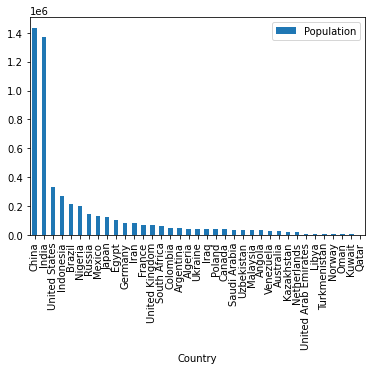

In [161]:
data = df_40_final.loc[df_40_final.Year == "2019-01-01",["Country","Population"]]
population = data.groupby("Country").mean().sort_values(by="Population",ascending=False)
population.plot.bar()

In [163]:

fig = px.bar(population, y='Population', x=population.index, text_auto='.2s',
            title="Población 40 Mayores Países Productores de Energía del Mundo")
fig.show()